In [11]:
#importing the Libraies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [13]:
df = pd.read_csv("Social_Network_Ads.csv")
df = pd.get_dummies(df, drop_first=True)
df.drop("User ID", axis=1, inplace=True )
df.head()

,Age,EstimatedSalary,Purchased,Gender_Male
0,19,19000,0,True
1,35,20000,0,True
2,26,43000,0,False
3,27,57000,0,False
4,19,76000,0,True


In [14]:
df["Purchased"].value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

In [15]:
df.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
Gender_Male        0
dtype: int64

In [16]:
df.duplicated().sum()

np.int64(20)

In [17]:
df.columns

Index(['Age', 'EstimatedSalary', 'Purchased', 'Gender_Male'], dtype='object')

In [18]:
# Split Input and Output
x_values = df.iloc[:,df.columns != 'Purchased']
y_values = df.iloc[:,df.columns == 'Purchased']

In [19]:
x_values.shape

(400, 3)

In [20]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_values, y_values, test_size=0.3, random_state=1)

In [21]:
# Importing Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier as RFC
model = RFC()
model.fit(x_train, y_train)

c:\Users\a-kjayar01\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [22]:
# prediction
y_pred = model.predict(x_test)

In [23]:
# Import confusion matrix
from sklearn.metrics import confusion_matrix as cm
cm = cm(y_test, y_pred)
print(cm)

[[59 13]
 [ 4 44]]


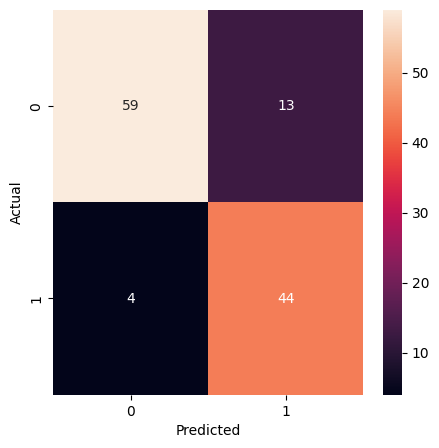

In [24]:
# Confusion Matrix Visualization
import seaborn as sns
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".0f")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [25]:
# Report
from sklearn.metrics import classification_report as cr
report = cr(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.94      0.82      0.87        72
           1       0.77      0.92      0.84        48

    accuracy                           0.86       120
   macro avg       0.85      0.87      0.86       120
weighted avg       0.87      0.86      0.86       120



In [26]:
# Calculate all metrics for display in markdown cells
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Get confusion matrix breakdown
tn, fp, fn, tp = cm.ravel()

print(f"Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"Precision: {precision:.4f} ({precision*100:.2f}%)")
print(f"Recall: {recall:.4f} ({recall*100:.2f}%)")
print(f"F1-Score: {f1:.4f} ({f1*100:.2f}%)")
print(f"\nConfusion Matrix:")
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")

Accuracy: 0.8583 (85.83%)
Precision: 0.7719 (77.19%)
Recall: 0.9167 (91.67%)
F1-Score: 0.8381 (83.81%)

Confusion Matrix:
True Negatives: 59
False Positives: 13
False Negatives: 4
True Positives: 44


## Question: Overall, how often is the model correct?

**Answer:** The model is correct **85.83%** of the time

- **Accuracy Score: 0.8583**
- This means out of 120 predictions, the model got 103 correct
- The model performs well with an accuracy above 85%

## Question: When the model predicts "Purchased", how often is it right?

**Answer:** When the model predicts "Purchased", it's correct **77.19%** of the time

- **Precision Score: 0.7719**
- Out of 57 "Purchased" predictions, 44 were actually correct
- This means 13 predictions were false positives (predicted purchase but didn't actually purchase)

## Question: Of all customers who actually purchased, how many did we catch?

**Answer:** We correctly identified **91.67%** of customers who actually purchased

- **Recall Score: 0.9167**
- Out of 48 customers who actually purchased, we caught 44 of them
- We only missed 4 potential customers (false negatives)

## Question: What's the balanced score between precision and recall?

**Answer:** The balanced F1-score is **83.81%**

- **F1-Score: 0.8381**
- This balances precision (77.19%) and recall (91.67%)
- F1-score closer to 1 is better - our score of 0.84 is quite good
- It shows the model performs well overall, with good balance between catching customers and avoiding false alarms

## Question: How many predictions were correct vs incorrect for each class?

**Answer:** Confusion Matrix Breakdown:

| Prediction Type | Count | Description |
|---|---|---|
| ✅ **True Negatives** | **59** | Correctly predicted "Not Purchased" |
| ❌ **False Positives** | **13** | Incorrectly predicted "Purchased" |
| ❌ **False Negatives** | **4** | Missed actual "Purchased" |
| ✅ **True Positives** | **44** | Correctly predicted "Purchased" |

**Summary:**
- **Total Correct Predictions: 103** (59 + 44)
- **Total Incorrect Predictions: 17** (13 + 4)
- **Total Test Cases: 120**

## Q1: What is Accuracy and how is it calculated?

**Answer:** 
Accuracy measures the overall correctness of the model. It tells us what percentage of predictions were correct.

**Formula:** 
Accuracy = (True Positives + True Negatives) / Total Predictions

**In simple terms:** 
Out of all predictions, how many were correct?

**When to use:** 
Best when classes are balanced. Not suitable when dealing with imbalanced datasets.

## Q2: What is Precision and why is it important?

**Answer:** 
Precision measures how many of the positive predictions were actually correct. It focuses on the quality of positive predictions.

**Formula:** 
Precision = True Positives / (True Positives + False Positives)

**In simple terms:** 
When the model predicts "Purchased", how often is it right?

**Business Example:** 
If precision is low, you're wasting money targeting customers who won't actually buy.

**When to use:** 
Important when the cost of False Positives is high.

## Q3: What is Recall (Sensitivity) and when is it crucial?

**Answer:** 
Recall measures how many of the actual positive cases were correctly identified. It focuses on capturing all positive instances.

**Formula:** 
Recall = True Positives / (True Positives + False Negatives)

**In simple terms:** 
Of all the customers who actually purchased, how many did we correctly identify?

**Business Example:** 
If recall is low, you're missing potential customers who would have bought your product.

**When to use:** 
Critical when the cost of False Negatives is high (missing opportunities).

## Q4: What is F1-Score and why is it useful?

**Answer:** 
F1-Score is the harmonic mean of Precision and Recall. It provides a single metric that balances both precision and recall.

**Formula:** 
F1-Score = 2 × (Precision × Recall) / (Precision + Recall)

**In simple terms:** 
It gives equal weight to both precision and recall, providing a balanced measure.

**Range:** 
F1-Score ranges from 0 to 1, where 1 is perfect.

**When to use:** 
- When you need a single metric that considers both precision and recall
- When classes are imbalanced
- When both false positives and false negatives are equally costly

## Q5: What does Support mean in the classification report?

**Answer:** 
Support indicates the number of actual occurrences of each class in the test dataset.

**In simple terms:** 
- Support for class 0 (Not Purchased): How many people actually didn't purchase
- Support for class 1 (Purchased): How many people actually purchased

**Why it matters:** 
- Helps identify if your dataset is balanced or imbalanced
- Larger support values give more reliable metric calculations
- Shows the distribution of your test data

**Example:** 
If Support for "Purchased" = 50 and "Not Purchased" = 70, then:
- 50 people actually purchased in your test set
- 70 people actually didn't purchase in your test set

## Q6: What's the difference between Macro avg and Weighted avg?

**Answer:** 

### Macro Average:
- Calculates metrics for each class separately, then takes the unweighted mean
- Treats all classes equally regardless of their frequency
- **Formula:** (Metric_Class0 + Metric_Class1) / 2

### Weighted Average:
- Calculates metrics for each class, then takes the weighted mean based on support
- Gives more importance to classes with more samples
- **Formula:** (Metric_Class0 × Support0 + Metric_Class1 × Support1) / Total_Support

**When to use:**
- **Macro avg:** When you want to treat all classes equally (good for balanced datasets)
- **Weighted avg:** When you want to account for class imbalance (more realistic for imbalanced datasets)

**Example:**
If you have 90 "Not Purchased" and 10 "Purchased" samples:
- Macro avg treats both classes equally
- Weighted avg gives more weight to "Not Purchased" class

In [27]:
# Input age, gender and estimated salary, and predict if the user will purchase the product or not
age = int(input("Enter Age: "))
gender = input("Enter M for Male and F for: ")
salary = int(input("Enter Estimated Salary: "))

In [28]:
# Preprocess input value of gender to 0 and 1
if gender.upper() == 'M':
    gender_encoded = 1  # Male = 1
else:
    gender_encoded = 0  # Female = 0

In [ ]:
# Create input array for prediction
user_input = [[age, salary, gender_encoded]]

# Make prediction
prediction = model.predict(user_input)
prediction_proba = model.predict_proba(user_input)

# Display result
if prediction[0] == 1:
    result = "Will Purchase"
    confidence = prediction_proba[0][1] * 100
else:
    result = "Will Not Purchase"
    confidence = prediction_proba[0][0] * 100

print(f"\nPrediction: {result}")
print(f"Confidence: {confidence:.2f}%")


Prediction: Will Purchase
Confidence: 94.00%


c:\Users\a-kjayar01\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\a-kjayar01\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1])